<a href="https://colab.research.google.com/github/SatienKC/ESWD/blob/main/Workshop5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the random seed for reproducibility
np.random.seed(1337)

# Generate the fake SBP dataset
training_size = 2000
testing_size = 400

train_ages = np.random.uniform(50, 80, training_size)
train_weights = np.random.uniform(50, 100, training_size)
train_SBP = np.random.uniform(110, 165, training_size)

test_ages = np.random.uniform(50, 80, testing_size)
test_weights = np.random.uniform(50, 100, testing_size)
test_SBP = np.random.uniform(110, 165, testing_size)

# Split the data into training and testing sets
X_train = np.column_stack((train_ages, train_weights))
y_train = train_SBP
X_test = np.column_stack((test_ages, test_weights))
y_test = test_SBP

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Make predictions on the training set
train_pred = model.predict(X_train)

# Calculate Train Mean Squared Error
train_mse = mean_squared_error(y_train, train_pred)

print(f"Train Mean Squared Error: {train_mse:.2f}")


Mean Squared Error: 247.86
R-squared: 0.00
Train Mean Squared Error: 256.92


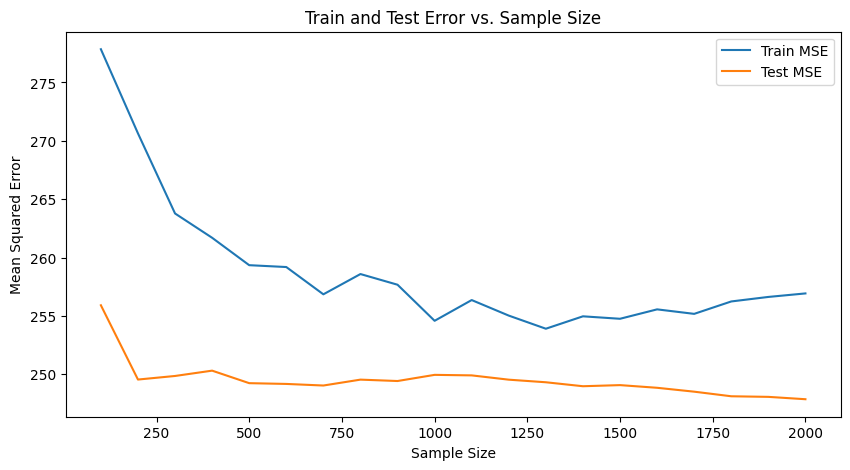

In [ ]:
# Plot train and test errors against sample size
train_errors = []
test_errors = []
sample_sizes = [i for i in range(100, training_size+1, 100)]

for size in sample_sizes:
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]

    model.fit(X_train_subset, y_train_subset)

    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, train_errors, label="Train MSE")
plt.plot(sample_sizes, test_errors, label="Test MSE")
plt.xlabel("Sample Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Train and Test Error vs. Sample Size")
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate mean squared error for different sample sizes
sample_sizes = [i for i in range(100, training_size + 1, 100)]
train_errors = []
test_errors = []

for size in sample_sizes:
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]

    model.fit(X_train_subset, y_train_subset)

    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train_subset, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Create a Plotly figure for the train and test errors
fig = go.Figure()

fig.add_trace(go.Scatter(x=sample_sizes, y=train_errors, mode='lines+markers', name='Train MSE'))
fig.add_trace(go.Scatter(x=sample_sizes, y=test_errors, mode='lines+markers', name='Test MSE'))

fig.update_layout(
    title='Train and Test Error vs. Sample Size',
    xaxis_title='Sample Size',
    yaxis_title='Mean Squared Error',
    legend=dict(x=0, y=1, traceorder="normal"),
    showlegend=True,
)

fig.show()

**Train MSE:** As the sample size increases, the training error also increases slightly. This could be due to the fact that as more data is included, it becomes slightly harder for the model to fit every point perfectly.
**Test MSE:** The test error decreases significantly when the sample size increases from 0 to 500. Beyond 500, the test error fluctuates but remains relatively stable.

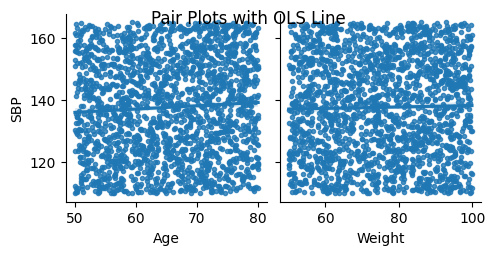

In [ ]:
# Create pair plots for each independent variable against the target with the OLS line
import pandas as pd

data = pd.DataFrame({'Age': X_train[:, 0], 'Weight': X_train[:, 1], 'SBP': y_train})
sns.pairplot(data, x_vars=['Age', 'Weight'], y_vars=['SBP'], kind='reg', markers='.')
plt.suptitle('Pair Plots with OLS Line')
plt.show()

The "Age" values range from approximately 50 to 80.
The "Weight" values range from approximately 60 to 100.
The "SBP" values seem to vary between roughly 110 and 165.
In summary, results from the linear regression analysis, neither "Age" nor "Weight" appear to have linear relationship with "SBP".